In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [84]:
data=pd.read_csv("heart.csv")
data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


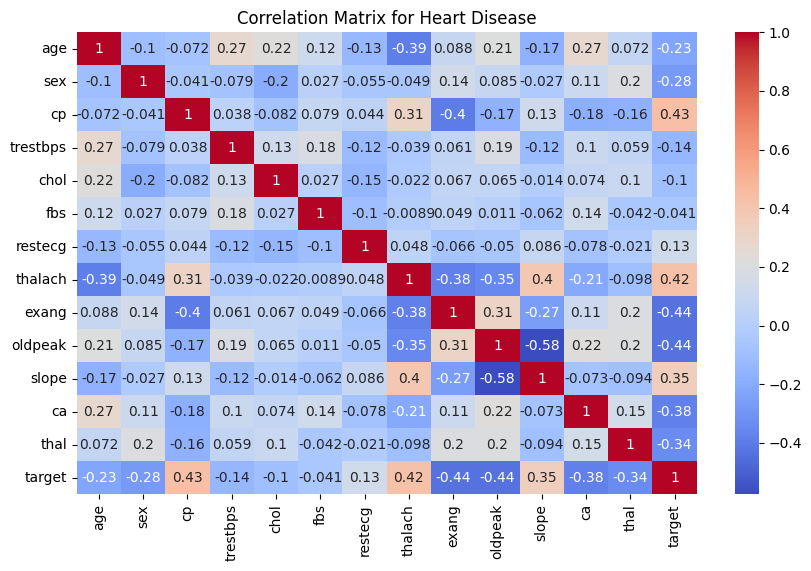

In [88]:
corr=data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("Correlation Matrix for Heart Disease")
plt.savefig("Corr.tiff",format='tiff',dpi=300)
plt.show()

In [37]:
x=data.iloc[:, :-1]
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [38]:
y=data.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [39]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(820, 13)
(820,)
(205, 13)
(205,)


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [62]:

pipe=Pipeline([('scale',StandardScaler()),('model',LogisticRegression(penalty='elasticnet', solver='saga'))])
print(pipe.get_params())

{'memory': None, 'steps': [('scale', StandardScaler()), ('model', LogisticRegression(penalty='elasticnet', solver='saga'))], 'transform_input': None, 'verbose': False, 'scale': StandardScaler(), 'model': LogisticRegression(penalty='elasticnet', solver='saga'), 'scale__copy': True, 'scale__with_mean': True, 'scale__with_std': True, 'model__C': 1.0, 'model__class_weight': None, 'model__dual': False, 'model__fit_intercept': True, 'model__intercept_scaling': 1, 'model__l1_ratio': None, 'model__max_iter': 100, 'model__multi_class': 'deprecated', 'model__n_jobs': None, 'model__penalty': 'elasticnet', 'model__random_state': None, 'model__solver': 'saga', 'model__tol': 0.0001, 'model__verbose': 0, 'model__warm_start': False}


In [63]:
grid=GridSearchCV(pipe,param_grid={'model__C': [0.1,.001,1,10], 'model__l1_ratio': [0.5,1,0],'model__max_iter':[11,100,1000]},cv=10)
grid.fit(x_train,y_train)

C:\Users\KIIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\KIIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\KIIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\KIIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\KIIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_

,estimator,Pipeline(step...ver='saga'))])
,param_grid,"{'model__C': [0.1, 0.001, ...], 'model__l1_ratio': [0.5, 1, ...], 'model__max_iter': [11, 100, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [73]:
print(grid.best_params_)
print(grid.best_score_)


{'model__C': 1, 'model__l1_ratio': 1, 'model__max_iter': 11}
0.8597560975609756


In [64]:
y_pred=grid.predict(x_test)
y_pred 


array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0])

In [65]:
print("accuracy:",accuracy_score(y_pred,y_test))
      

accuracy: 0.7951219512195122


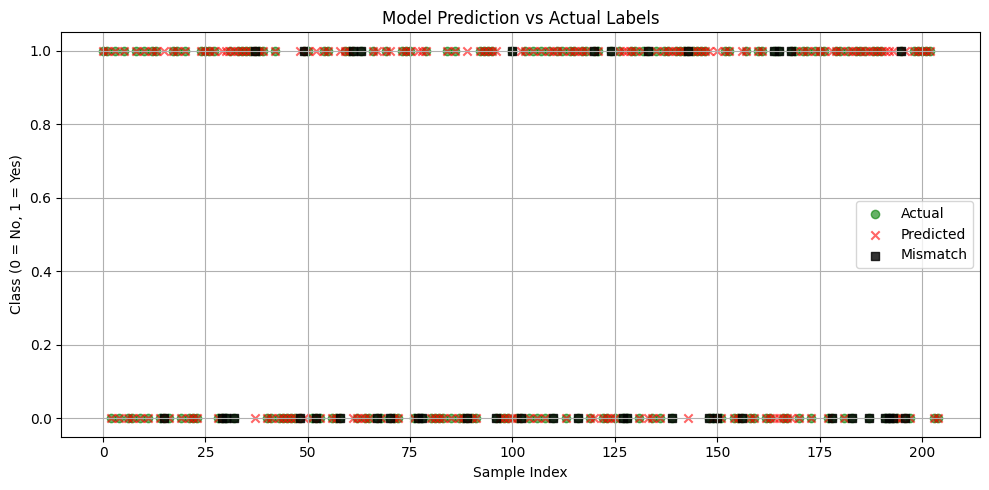

In [88]:
y_test = np.array(y_test)
y_pred = np.array(y_pred)
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, label='Actual', marker='o', color='green', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', marker='x', color='red', alpha=0.6)
mismatches = y_test != y_pred
plt.scatter(np.where(mismatches), y_test[mismatches], color='black', marker='s', label='Mismatch', alpha=0.8)
plt.title("Model Prediction vs Actual Labels")
plt.xlabel("Sample Index")
plt.ylabel("Class (0 = No, 1 = Yes)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [69]:
cm=classification_report(y_pred,y_test, target_names=["without Heart Diseases","with Heart Diseases"])
print(cm)

                        precision    recall  f1-score   support

without Heart Diseases       0.72      0.85      0.78        86
   with Heart Diseases       0.87      0.76      0.81       119

              accuracy                           0.80       205
             macro avg       0.79      0.80      0.79       205
          weighted avg       0.81      0.80      0.80       205



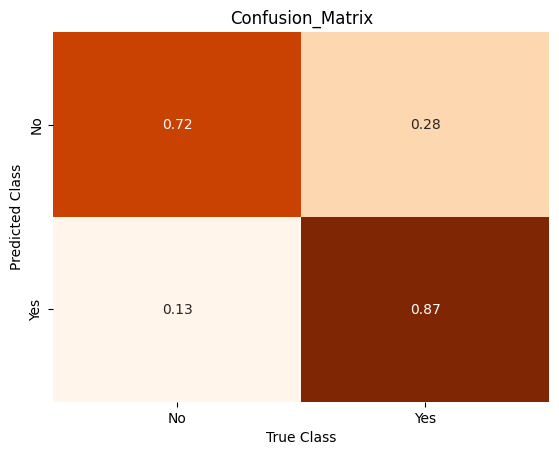

In [86]:
import seaborn as sns
conf_rep=confusion_matrix(y_test,y_pred,normalize='true')
sns.heatmap(conf_rep,annot=True,cbar=False,cmap="Oranges",fmt=".2f",xticklabels=["No","Yes"],yticklabels=['No','Yes'])
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.title("Confusion_Matrix")
plt.show()


In [123]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
a=data.iloc[:, :-1]
b=data.iloc[:,-1]
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=42)

In [125]:

pipe1=Pipeline([('scale',StandardScaler()),('model1',KNeighborsClassifier())])
print(pipe1.get_params())

{'memory': None, 'steps': [('scale', StandardScaler()), ('model1', KNeighborsClassifier())], 'transform_input': None, 'verbose': False, 'scale': StandardScaler(), 'model1': KNeighborsClassifier(), 'scale__copy': True, 'scale__with_mean': True, 'scale__with_std': True, 'model1__algorithm': 'auto', 'model1__leaf_size': 30, 'model1__metric': 'minkowski', 'model1__metric_params': None, 'model1__n_jobs': None, 'model1__n_neighbors': 5, 'model1__p': 2, 'model1__weights': 'uniform'}


In [126]:
grid1=GridSearchCV(pipe1,param_grid={'model1__metric': ['euclidean','manhattan'], 'model1__n_neighbors': [1,2,3,4,5,10,20,30,40,50,80,100,90],'model1__weights': ['uniform','distance']},cv=10)
grid1.fit(a_train,b_train)

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'model1__metric': ['euclidean', 'manhattan'], 'model1__n_neighbors': [1, 2, ...], 'model1__weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [127]:
b_pred=grid1.predict(a_test)
print(accuracy_score(b_pred,b_test))

1.0


In [128]:
grid1.best_params_

{'model1__metric': 'manhattan',
 'model1__n_neighbors': 50,
 'model1__weights': 'distance'}

In [129]:
print(classification_report(b_pred,b_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



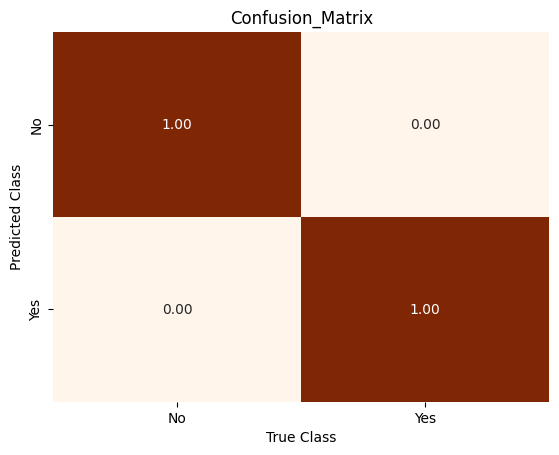

In [130]:
import seaborn as sns
conf_rep1=confusion_matrix(b_test,b_pred,normalize='true')
sns.heatmap(conf_rep1,annot=True,cbar=False,cmap="Oranges",fmt=".2f",xticklabels=["No","Yes"],yticklabels=['No','Yes'])
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.title("Confusion_Matrix")
plt.show()


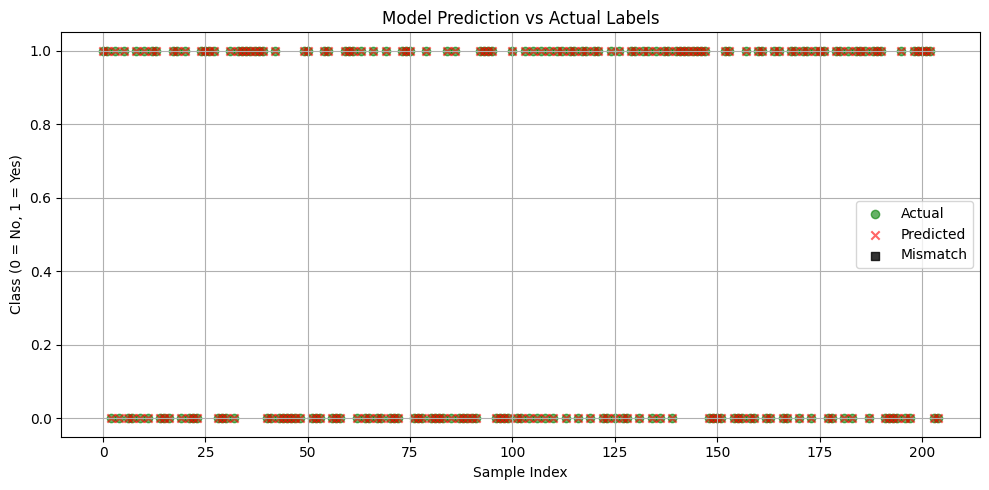

In [131]:
b_test = np.array(b_test)
b_pred = np.array(b_pred)
plt.figure(figsize=(10, 5))
plt.scatter(range(len(b_test)), b_test, label='Actual', marker='o', color='green', alpha=0.6)
plt.scatter(range(len(b_pred)), b_pred, label='Predicted', marker='x', color='red', alpha=0.6)
mismatches = b_test != b_pred
plt.scatter(np.where(mismatches), b_test[mismatches], color='black', marker='s', label='Mismatch', alpha=0.8)
plt.title("Model Prediction vs Actual Labels")
plt.xlabel("Sample Index")
plt.ylabel("Class (0 = No, 1 = Yes)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
p=data.iloc[:, :-1]
q=data.iloc[:,-1]
p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.2,random_state=42)

In [83]:
pipe2=Pipeline([('scale',StandardScaler()),('model2',DecisionTreeClassifier())])
print(pipe2.get_params())

{'memory': None, 'steps': [('scale', StandardScaler()), ('model2', DecisionTreeClassifier())], 'transform_input': None, 'verbose': False, 'scale': StandardScaler(), 'model2': DecisionTreeClassifier(), 'scale__copy': True, 'scale__with_mean': True, 'scale__with_std': True, 'model2__ccp_alpha': 0.0, 'model2__class_weight': None, 'model2__criterion': 'gini', 'model2__max_depth': None, 'model2__max_features': None, 'model2__max_leaf_nodes': None, 'model2__min_impurity_decrease': 0.0, 'model2__min_samples_leaf': 1, 'model2__min_samples_split': 2, 'model2__min_weight_fraction_leaf': 0.0, 'model2__monotonic_cst': None, 'model2__random_state': None, 'model2__splitter': 'best'}


In [84]:
parameter={'model2__criterion': ['gini', 'entropy', 'log_loss'],
           'model2__splitter':['best','random'],
           'model2__max_depth':[1,2,3,4,5,6,7,10],
          'model2__max_features':['sqrt','log2','auto']
          }

In [86]:
grid2=GridSearchCV(pipe2,param_grid=parameter,cv=10)
grid2.fit(p_train,q_train)


C:\Users\KIIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
480 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KIIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\KIIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\KIIT\AppDat

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'model2__criterion': ['gini', 'entropy', ...], 'model2__max_depth': [1, 2, ...], 'model2__max_features': ['sqrt', 'log2', ...], 'model2__splitter': ['best', 'random']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [87]:
results=pd.DataFrame(grid2.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model2__criterion,param_model2__max_depth,param_model2__max_features,param_model2__splitter,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005696,0.001719,0.002877,0.000786,gini,1,sqrt,best,"{'model2__criterion': 'gini', 'model2__max_dep...",0.743902,...,0.658537,0.817073,0.707317,0.817073,0.609756,0.780488,0.658537,0.737805,0.070952,78
1,0.004542,0.001231,0.002079,0.000364,gini,1,sqrt,random,"{'model2__criterion': 'gini', 'model2__max_dep...",0.780488,...,0.682927,0.817073,0.512195,0.804878,0.695122,0.743902,0.682927,0.725610,0.084710,82
2,0.004012,0.000484,0.002242,0.000754,gini,1,log2,best,"{'model2__criterion': 'gini', 'model2__max_dep...",0.780488,...,0.719512,0.817073,0.682927,0.804878,0.682927,0.609756,0.695122,0.732927,0.063238,81
3,0.004154,0.001161,0.002019,0.000514,gini,1,log2,random,"{'model2__criterion': 'gini', 'model2__max_dep...",0.743902,...,0.731707,0.670732,0.719512,0.780488,0.695122,0.548780,0.658537,0.682927,0.081443,93
4,0.003409,0.000431,0.000000,0.000000,gini,1,auto,best,"{'model2__criterion': 'gini', 'model2__max_dep...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.004331,0.000553,0.002257,0.000650,log_loss,10,sqrt,random,"{'model2__criterion': 'log_loss', 'model2__max...",0.963415,...,0.902439,0.914634,0.963415,0.939024,0.914634,0.926829,0.865854,0.928049,0.028574,10
140,0.005075,0.000745,0.002182,0.000348,log_loss,10,log2,best,"{'model2__criterion': 'log_loss', 'model2__max...",0.975610,...,0.914634,0.975610,0.975610,0.963415,0.963415,0.914634,0.987805,0.959756,0.028885,6
141,0.004472,0.000744,0.001896,0.000302,log_loss,10,log2,random,"{'model2__criterion': 'log_loss', 'model2__max...",0.963415,...,0.939024,0.975610,0.878049,0.939024,0.939024,0.902439,0.914634,0.931707,0.036259,8
142,0.003707,0.000571,0.000000,0.000000,log_loss,10,auto,best,"{'model2__criterion': 'log_loss', 'model2__max...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97


In [88]:
grid2.best_params_

{'model2__criterion': 'gini',
 'model2__max_depth': 10,
 'model2__max_features': 'log2',
 'model2__splitter': 'best'}

In [89]:
y2_pred=grid2.predict(p_test)

In [90]:
print("prediction :", y2_pred)

prediction : [1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0
 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1
 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1
 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1
 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0]


In [91]:
print("Accuracy:",accuracy_score(y2_pred,q_test))


Accuracy: 0.9609756097560975


In [92]:
print(classification_report(y2_pred,q_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       100
           1       0.97      0.95      0.96       105

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



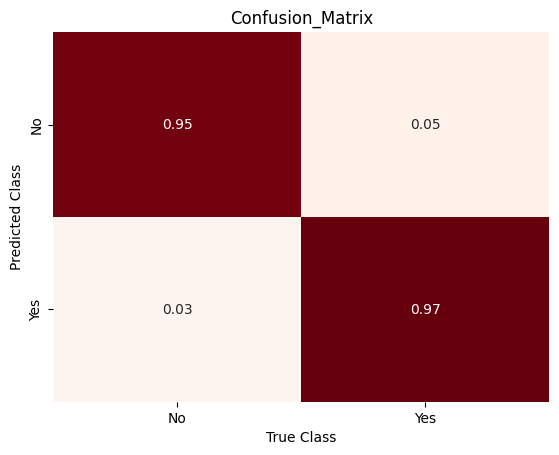

In [93]:
import seaborn as sns
conf_rep2=confusion_matrix(q_test,y2_pred,normalize='true')
sns.heatmap(conf_rep2,annot=True,cbar=False,cmap="Reds",fmt=".2f",xticklabels=["No","Yes"],yticklabels=['No','Yes'])
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.title("Confusion_Matrix")
plt.show()


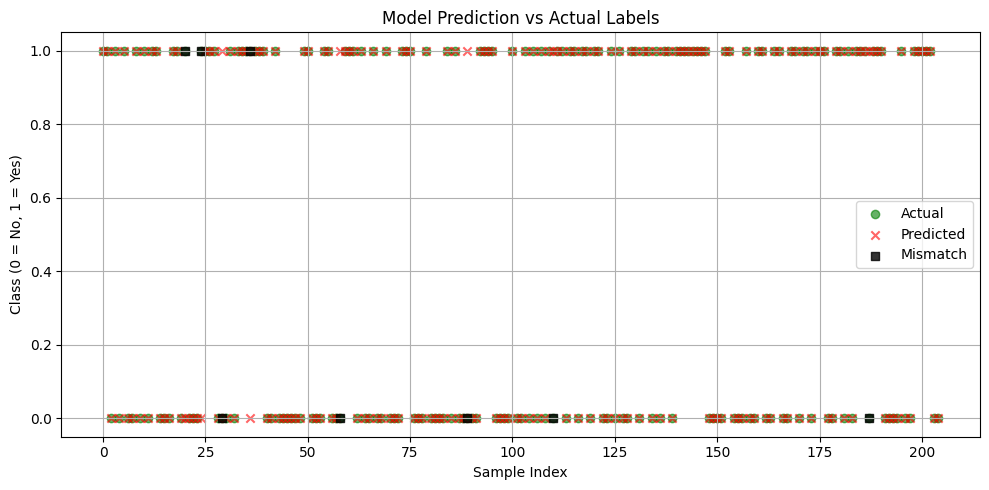

In [94]:
q_test = np.array(q_test)
y2_pred = np.array(y2_pred)
plt.figure(figsize=(10, 5))
plt.scatter(range(len(q_test)), q_test, label='Actual', marker='o', color='green', alpha=0.6)
plt.scatter(range(len(y2_pred)), y2_pred, label='Predicted', marker='x', color='red', alpha=0.6)
mismatches = q_test != y2_pred
plt.scatter(np.where(mismatches), q_test[mismatches], color='black', marker='s', label='Mismatch', alpha=0.8)
plt.title("Model Prediction vs Actual Labels")
plt.xlabel("Sample Index")
plt.ylabel("Class (0 = No, 1 = Yes)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [47]:
s=data.iloc[:, :-1]
t=data.iloc[:,-1]
s_train,s_test,t_train,t_test=train_test_split(s,t,test_size=0.2,random_state=42)

In [48]:
pipe3=Pipeline([('Scale',StandardScaler()),('model3',RandomForestClassifier())])
pipe3.get_params()

{'memory': None,
 'steps': [('Scale', StandardScaler()), ('model3', RandomForestClassifier())],
 'transform_input': None,
 'verbose': False,
 'Scale': StandardScaler(),
 'model3': RandomForestClassifier(),
 'Scale__copy': True,
 'Scale__with_mean': True,
 'Scale__with_std': True,
 'model3__bootstrap': True,
 'model3__ccp_alpha': 0.0,
 'model3__class_weight': None,
 'model3__criterion': 'gini',
 'model3__max_depth': None,
 'model3__max_features': 'sqrt',
 'model3__max_leaf_nodes': None,
 'model3__max_samples': None,
 'model3__min_impurity_decrease': 0.0,
 'model3__min_samples_leaf': 1,
 'model3__min_samples_split': 2,
 'model3__min_weight_fraction_leaf': 0.0,
 'model3__monotonic_cst': None,
 'model3__n_estimators': 100,
 'model3__n_jobs': None,
 'model3__oob_score': False,
 'model3__random_state': None,
 'model3__verbose': 0,
 'model3__warm_start': False}

In [49]:
param_grids={'model3__n_estimators':[100,200],'model3__max_depth': [6,8,10,None],'model3__min_samples_split': [2,4],'model3__min_samples_leaf': [1,2],'model3__bootstrap': [True]}


In [102]:
rand_search=RandomizedSearchCV(pipe3,param_distributions=param_grids,cv=10,verbose=1)
rand_search.fit(s_train,t_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,estimator,Pipeline(step...lassifier())])
,param_distributions,"{'model3__bootstrap': [True], 'model3__max_depth': [6, 8, ...], 'model3__min_samples_leaf': [1, 2], 'model3__min_samples_split': [2, 4], ...}"
,n_iter,10
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [51]:
print(rand_search.best_params_)

{'model3__n_estimators': 100, 'model3__min_samples_split': 2, 'model3__min_samples_leaf': 1, 'model3__max_depth': None, 'model3__bootstrap': True}


In [52]:
print(rand_search.best_score_)

0.9902439024390244


In [53]:
y3_pred=rand_search.predict(s_test)
y3_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0])

In [54]:
print("accuracy:",accuracy_score(y3_pred,t_test))

accuracy: 0.9853658536585366


In [55]:
print(classification_report(y3_pred,t_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.97      1.00      0.99       100

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



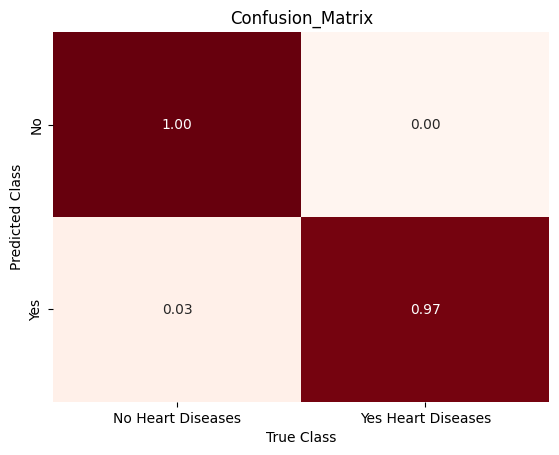

<Figure size 640x480 with 0 Axes>

In [145]:
import seaborn as sns
conf_rep3=confusion_matrix(t_test,y3_pred,normalize='true')
sns.heatmap(conf_rep3,annot=True,cbar=False,cmap="Reds",fmt=".2f",xticklabels=["No Heart Diseases","Yes Heart Diseases"],yticklabels=['No','Yes'])
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.title("Confusion_Matrix")
plt.show()
plt.savefig('Confusion_matrix_Xgboost.tiff', format='tiff', dpi=300)
plt.show()

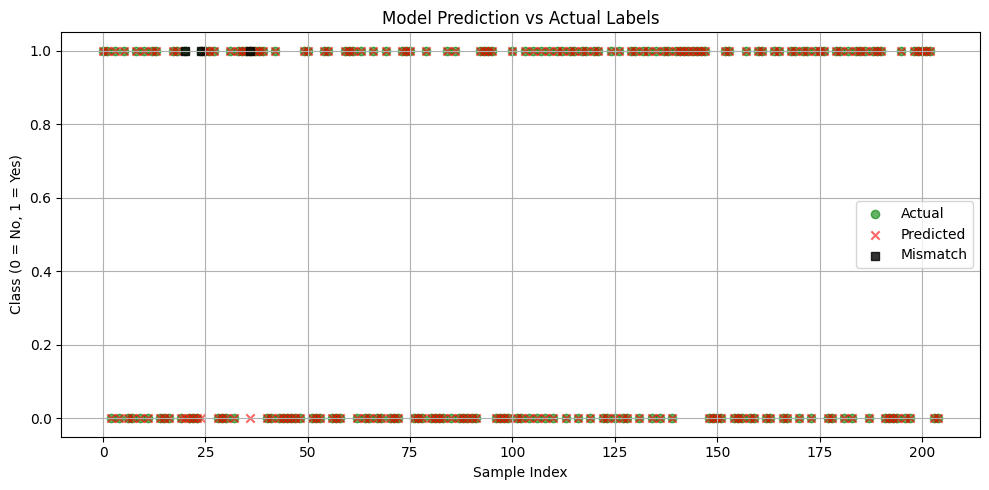

In [22]:
t_test = np.array(t_test)
y3_pred = np.array(y3_pred)
plt.figure(figsize=(10, 5))
plt.scatter(range(len(t_test)), t_test, label='Actual', marker='o', color='green', alpha=0.6)
plt.scatter(range(len(y3_pred)), y3_pred, label='Predicted', marker='x', color='red', alpha=0.6)
mismatches = t_test != y3_pred
plt.scatter(np.where(mismatches), t_test[mismatches], color='black', marker='s', label='Mismatch', alpha=0.8)
plt.title("Model Prediction vs Actual Labels")
plt.xlabel("Sample Index")
plt.ylabel("Class (0 = No, 1 = Yes)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [113]:
from xgboost import XGBClassifier

In [114]:
s=data.iloc[:, :-1]
t=data.iloc[:,-1]
s_train,s_test,t_train,t_test=train_test_split(c,d,test_size=0.2,random_state=42)

In [115]:
pipe4=Pipeline([('scale',StandardScaler()),('model4',XGBClassifier())])
print(pipe4.get_params())

{'memory': None, 'steps': [('scale', StandardScaler()), ('model4', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...))], 'transform_input': None, 'verbose': False, 'scale': StandardScaler(), 'model4': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_byle

In [116]:
param={'model4__learning_rate':[0.01,0.05,0.1,0.2],'model4__n_estimators':[100,200],'model4__colsample_bytree':[0.7,0.8,0.9,1.0], 'model4__max_depth':[3,5,7,8,10],'model4__subsample':[0.7,0.8,0.9,1.0]}

In [104]:
grid4=RandomizedSearchCV(pipe4,param_distributions=param,cv=10,verbose=1)
grid4.fit(s_train,t_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,estimator,"Pipeline(step...=None, ...))])"
,param_distributions,"{'model4__colsample_bytree': [0.7, 0.8, ...], 'model4__learning_rate': [0.01, 0.05, ...], 'model4__max_depth': [3, 5, ...], 'model4__n_estimators': [100, 200], ...}"
,n_iter,10
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [118]:
y4_pred=grid4.predict(s_test)
y4_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0])

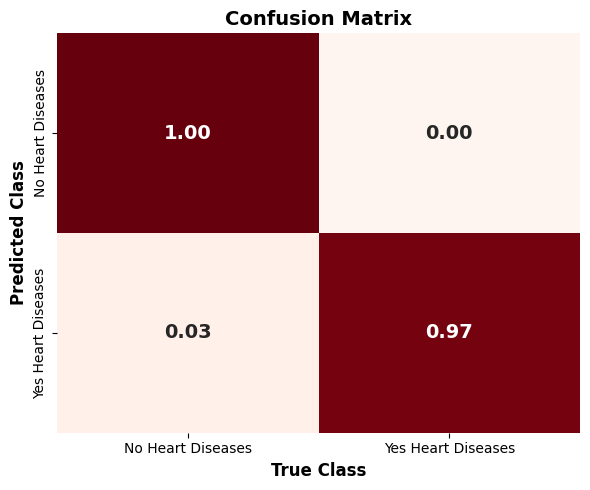

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_rep4 = confusion_matrix(t_test, y4_pred, normalize='true')
plt.figure(figsize=(6, 5))
sns.heatmap(conf_rep4, annot=True, cbar=False, cmap="Reds", fmt=".2f",
            xticklabels=["No Heart Diseases", "Yes Heart Diseases"],
            yticklabels=["No Heart Diseases", "Yes Heart Diseases"],
            annot_kws={"size": 14, "weight": "bold"}) 
plt.xlabel("True Class", fontsize=12, fontweight='bold')
plt.ylabel("Predicted Class", fontsize=12, fontweight='bold')
plt.title("Confusion Matrix", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('Confusion_matrix_Xgboost.tiff', format='tiff', dpi=300)
plt.show()

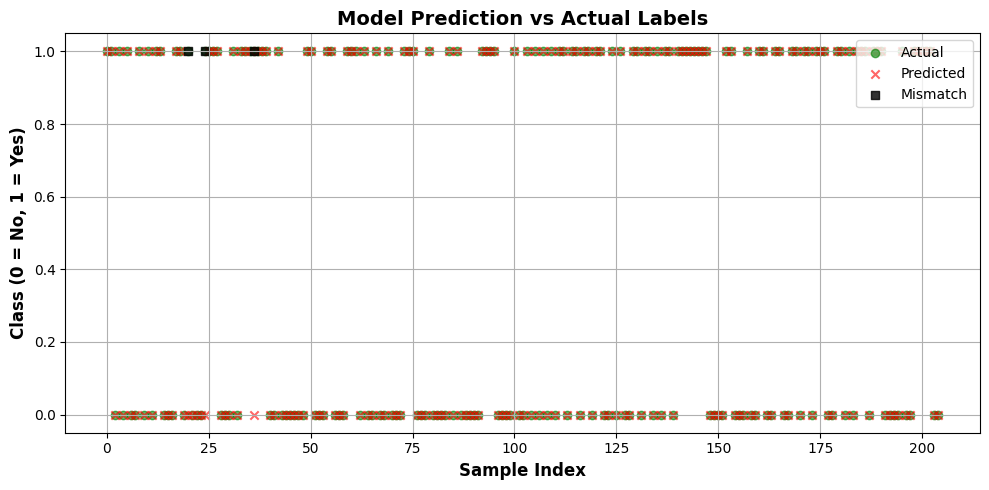

In [164]:
import numpy as np
import matplotlib.pyplot as plt
t_test = np.array(t_test)
y4_pred = np.array(y4_pred)
plt.figure(figsize=(10, 5))
plt.scatter(range(len(t_test)), t_test, label='Actual', marker='o', color='green', alpha=0.6)
plt.scatter(range(len(y4_pred)), y4_pred, label='Predicted', marker='x', color='red', alpha=0.6)
mismatches = t_test != y4_pred
plt.scatter(np.where(mismatches), t_test[mismatches], color='black', marker='s', label='Mismatch', alpha=0.8)
plt.title("Model Prediction vs Actual Labels", fontsize=14, fontweight='bold')
plt.xlabel("Sample Index", fontsize=12, fontweight='bold')
plt.ylabel("Class (0 = No, 1 = Yes)", fontsize=12, fontweight='bold')
plt.legend(fontsize=10, loc='upper right', frameon=True)
plt.grid(True)
plt.tight_layout()
plt.savefig('Model_prediction_vs_Actual_labels1.tiff', format='tiff', dpi=300)
plt.show()

In [129]:
print("Accuracy:",accuracy_score(y4_pred,t_test))

Accuracy: 0.9853658536585366


In [130]:
print(classification_report(y4_pred,t_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.97      1.00      0.99       100

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [17]:
from sklearn.ensemble import VotingClassifier

In [105]:
model3=RandomForestClassifier(random_state=42,n_estimators=100)
model4=XGBClassifier(random_state=42,n_estimators=100,learning_rate=0.1)
voting_model=VotingClassifier(estimators=[('model3',model3),('model4',model4)],voting='soft')
voting_model.fit(s_train,t_train)


,estimators,"[('model3', ...), ('model4', ...)]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


In [37]:
y_pred_vote=voting_model.predict(s_test)

In [38]:
print("accuracy:", accuracy_score(y_pred_vote,t_test))

accuracy: 0.9853658536585366


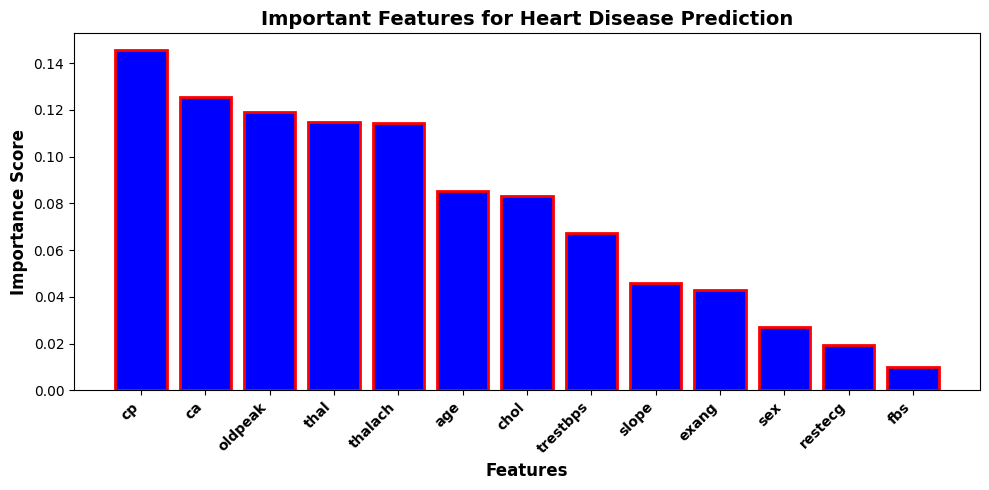

In [143]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(10, 5))
bars = plt.bar(feat_imp.index, feat_imp.values, color='blue', linewidth=2, edgecolor='red')
plt.xticks(rotation=45, ha='right', fontsize=10, fontweight='bold')
plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.ylabel('Importance Score', fontsize=12, fontweight='bold')
plt.title('Important Features for Heart Disease Prediction', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('heart_importance_feat.tiff', format='tiff', dpi=300)
plt.show()

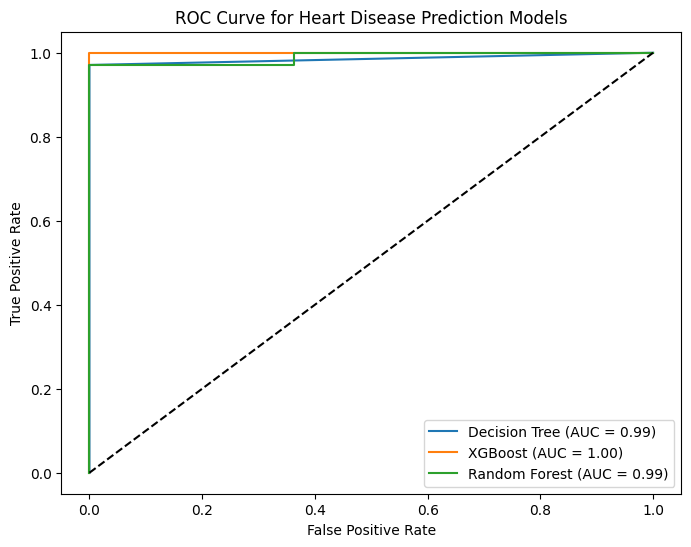

In [155]:
pipe2.fit(s_train,t_train)
pipe4.fit(s_train,t_train)
pipe3.fit(s_train,t_train)
from sklearn.metrics import roc_curve, roc_auc_score
pipelines=[pipe2,pipe3,pipe4]
model_names = ["Decision Tree","XGBoost","Random Forest", ]

plt.figure(figsize=(8,6))

for pipe, name in zip(pipelines, model_names):
    y_proba = pipe.predict_proba(s_test)[:,1]
    fpr, tpr, thresholds = roc_curve(t_test, y_proba)
    auc_score = roc_auc_score(t_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Disease Prediction Models')
plt.legend()
plt.savefig('ROC_Curve1.tiff', format='tiff', dpi=200)

plt.show()


In [165]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [167]:
data["target"]=np.where(data["target"]==0,"Yes Heart Disease","No Heart Disease")

In [168]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,Yes Heart Disease
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,Yes Heart Disease
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,Yes Heart Disease
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,Yes Heart Disease
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,Yes Heart Disease


AttributeError: 'Tensor' object has no attribute 'corr'

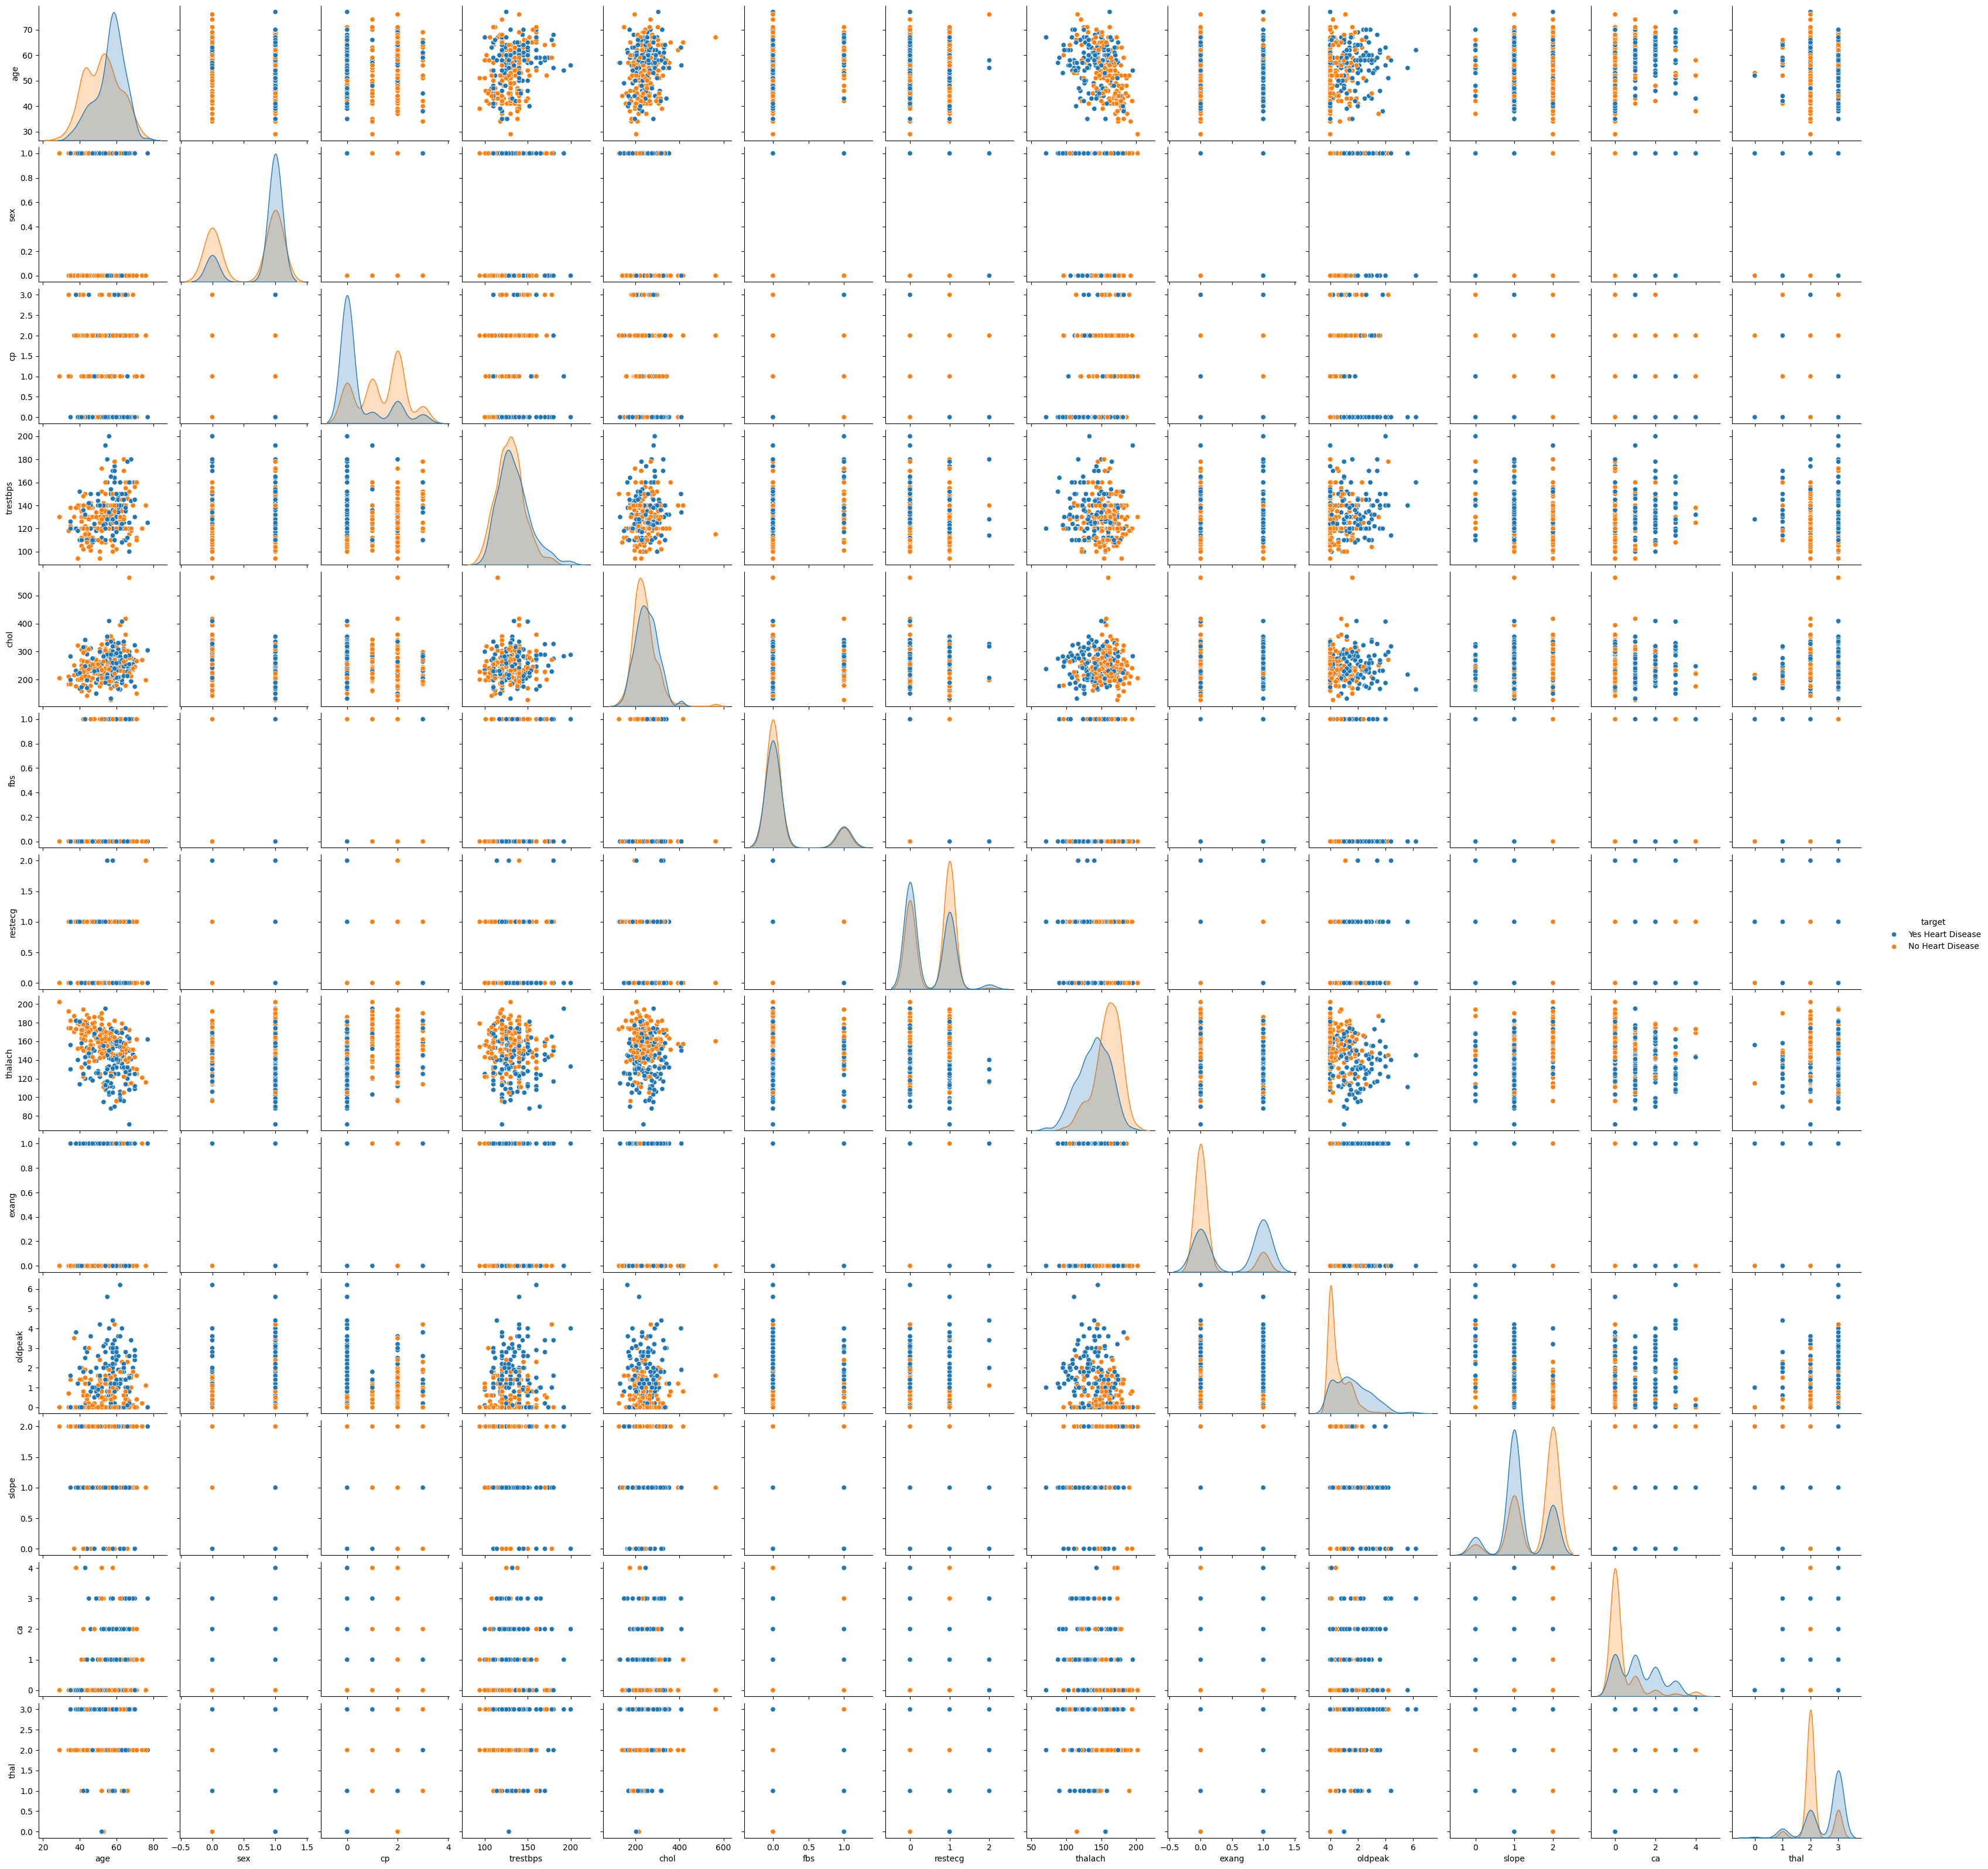

In [169]:
sns.pairplot(data,hue="target")

In [171]:
print(x.shape)
print(y.shape)

(1025, 13)
(1025,)


In [178]:
print(x_train.shape)

(820, 13)


In [41]:
import torch
import torch.nn as nn
import torch.nn.functional as f

In [42]:
torch.cuda.is_available()

True

In [43]:
x_train=torch.FloatTensor(x_train.values)
x_test=torch.FloatTensor(x_test.values)
y_test=torch.LongTensor(y_test.values)
y_train=torch.LongTensor(y_train.values)

In [44]:
print(x_train.shape)

torch.Size([820, 13])


In [45]:
print(y_test.shape)

torch.Size([205])


In [143]:
class ANN_Model(nn.Module):
    def __init__(self,input_feat=13,hidden1=64,hidden2=64,output_feat=2):
        super().__init__()
        self.F_connected1=nn.Linear(input_feat,hidden1)
        self.F_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,output_feat)
    def forward(self,x):
        x=f.relu(self.F_connected1(x))
        x=f.relu(self.F_connected2(x))
        x=self.out(x)
        return x
        

In [144]:
torch.manual_seed(42)
model=ANN_Model()
model.parameters

<bound method Module.parameters of ANN_Model(
  (F_connected1): Linear(in_features=13, out_features=64, bias=True)
  (F_connected2): Linear(in_features=64, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=2, bias=True)
)>

In [145]:
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [146]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(x_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if(i%10==1):
        print("Epoch Number :{} and the Loss:{}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
              

Epoch Number :1 and the Loss:1.121346116065979
Epoch Number :11 and the Loss:0.6590985655784607
Epoch Number :21 and the Loss:0.637559711933136
Epoch Number :31 and the Loss:0.5929786562919617
Epoch Number :41 and the Loss:0.5712854862213135
Epoch Number :51 and the Loss:0.5629754662513733
Epoch Number :61 and the Loss:0.5533298850059509
Epoch Number :71 and the Loss:0.5438170433044434
Epoch Number :81 and the Loss:0.5358887910842896
Epoch Number :91 and the Loss:0.5285329818725586
Epoch Number :101 and the Loss:0.520510733127594
Epoch Number :111 and the Loss:0.5127677321434021
Epoch Number :121 and the Loss:0.5048425197601318
Epoch Number :131 and the Loss:0.49673953652381897
Epoch Number :141 and the Loss:0.4881635308265686
Epoch Number :151 and the Loss:0.47875750064849854
Epoch Number :161 and the Loss:0.46885085105895996
Epoch Number :171 and the Loss:0.4589134156703949
Epoch Number :181 and the Loss:0.44798487424850464
Epoch Number :191 and the Loss:0.4369284510612488
Epoch Numb

Text(0, 0.5, 'Loss')

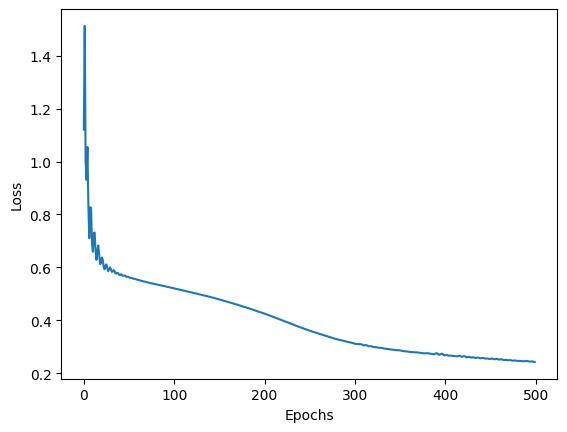

In [148]:
losss=[loss.detach().cpu().item() for loss in final_losses]
plt.plot(range(epochs),losss)
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [149]:
pred=[]
for i, data in enumerate(x_test):
    y_pred=model(data)
    pred.append(y_pred.argmax().item())
    print(y_pred.argmax().item())

1
1
0
1
0
1
0
0
1
0
1
0
1
1
0
1
0
1
1
0
1
0
0
0
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
0
0
1
0
0
0
0
0
1
0
0
0
1
0
1
1
0
0
1
1
1
0
0
0
0
0
1
0
0
1
1
0
0
1
1
1
0
1
0
1
0
0
0
0
1
0
1
0
0
1
1
0
1
1
1
1
0
0
0
0
1
0
1
1
0
1
0
1
0
1
1
1
1
0
1
1
1
1
1
0
1
1
0
0
0
0
1
0
1
1
1
0
1
1
0
1
0
1
1
1
1
1
1
0
1
1
0
1
1
0
1
0
1
1
0
0
0
1
0
0
1
1
0
0
0
0
0
0
0
1
0
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
0
0
1
0
0
1
0
1
1
0
1
1
0
0


In [150]:
print(pred)

[1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0]


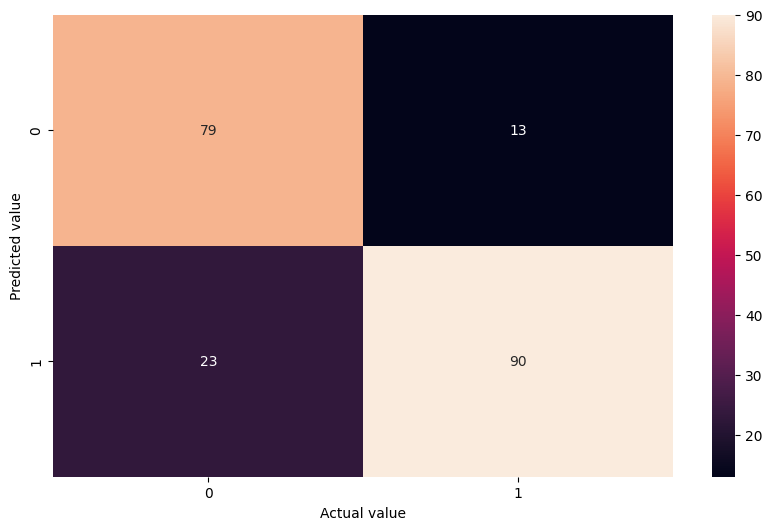

In [151]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(pred,y_test)
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.show()

In [152]:
score=accuracy_score(y_test,pred)
score

0.824390243902439

In [123]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.83      0.79      0.81       102
           1       0.80      0.83      0.82       103

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205

